### Data Description

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.
The target variable here is class and all features are categorical in nature 

### Importing Required Libraries 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [41]:
df= pd.read_csv(r"mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
df.shape

(8124, 23)

Data has 8124 rows and 23 columns

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [44]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Data has no null values

In [45]:
for col in df:
    print(col," values are :\n",df[col].value_counts(),"\n")

class  values are :
 e    4208
p    3916
Name: class, dtype: int64 

cap-shape  values are :
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-surface  values are :
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

cap-color  values are :
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

bruises  values are :
 f    4748
t    3376
Name: bruises, dtype: int64 

odor  values are :
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 

gill-attachment  values are :
 f    7914
a     210
Name: gill-attachment, dtype: int64 

gill-spacing  values are :
 c    6812
w    1312
Name: gill-spacing, dtype: int64 

gill-size  values are :
 b    5612
n    2512
Name: gill-size, dtype: int64 

gill-color  values are :
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k

Since veil-type has a single parameter therefore it won't effect our model. So we drop it

In [46]:
df= df.drop(columns=["veil-type"])

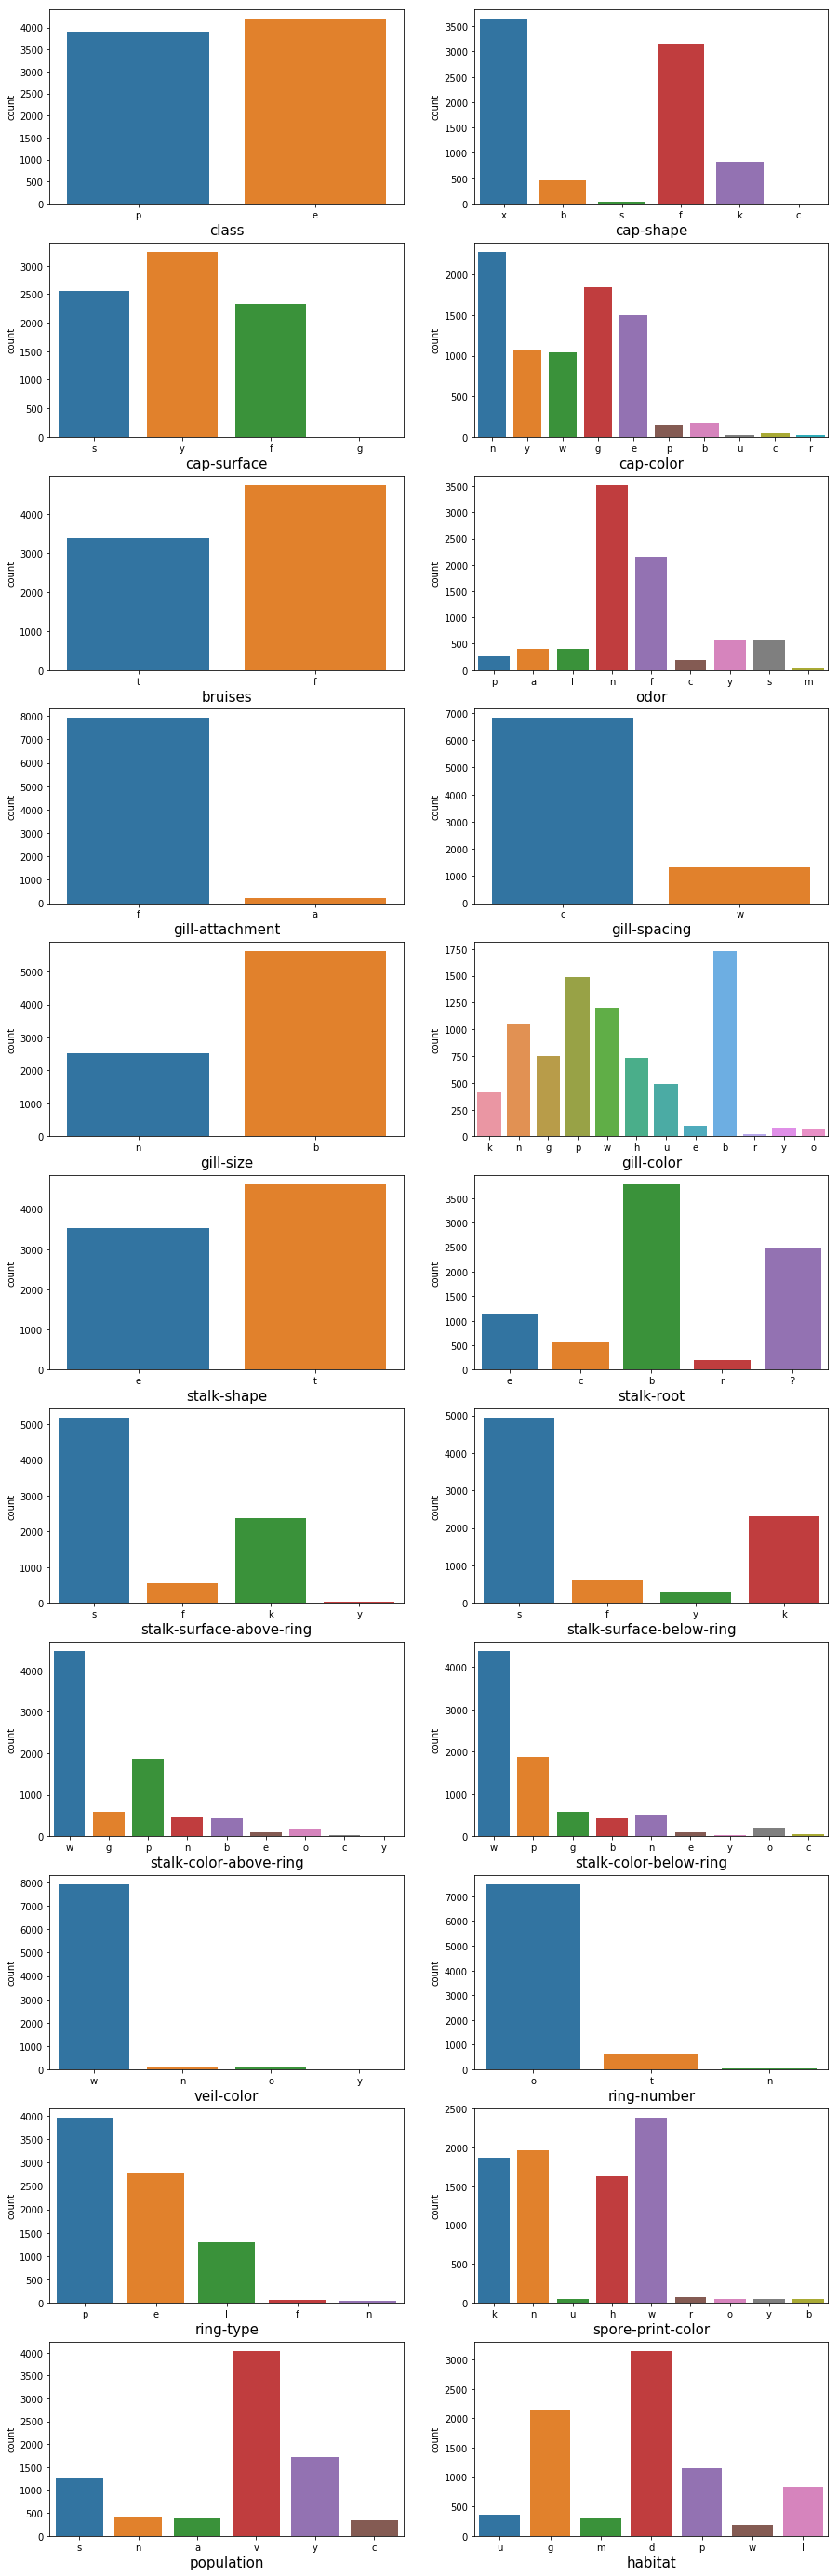

In [47]:
plt.figure(figsize=(15,50))
pltno=1
for col in df:
    if pltno<=22:
        ax=plt.subplot(11,2,pltno)
        sns.countplot(x= col, data= df)
        plt.xlabel(col,fontsize=15)
    pltno+=1
plt.show()

Now we will encode our values to pass them in a model 

In [48]:
## Using Label Encoder
lab_enc=LabelEncoder()
for col in df:
    df1= lab_enc.fit_transform(df[col])
    df[col]=df1
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.shape

(8124, 22)

Data now has 8124 rows and 22 column

### Checking correlation

In [51]:
corr_mat= df.corr()
corr_mat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


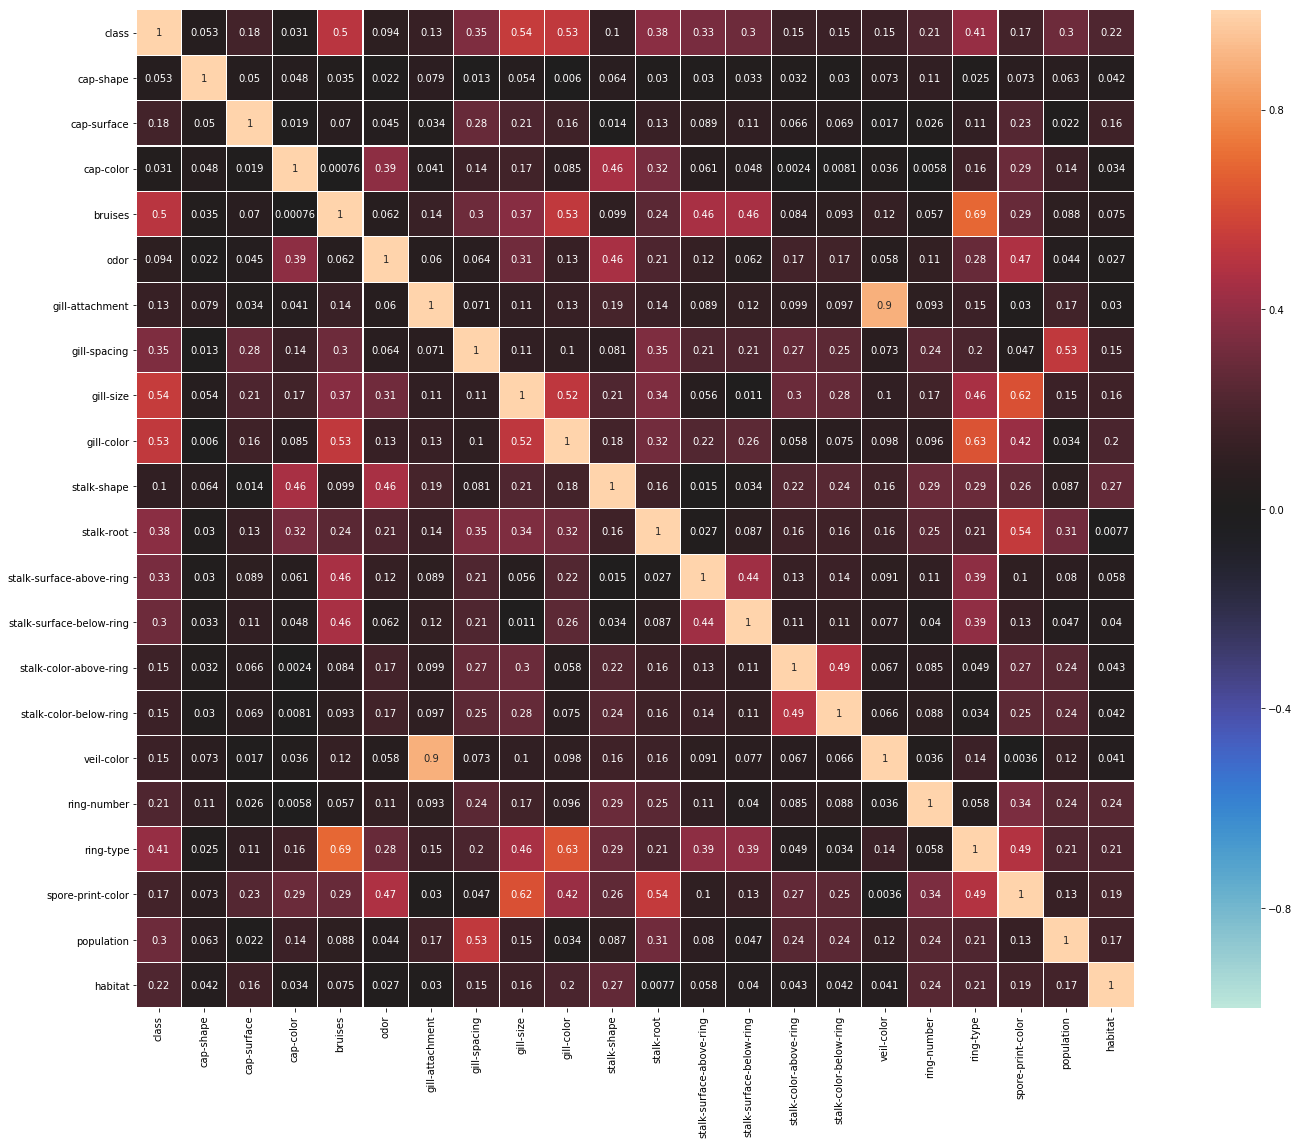

In [52]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe that veil-color and gill-attachment is highly correlated.
Now we will check there relation with class

In [53]:
corr_mat["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

We observe that veil-color and gill-attachment are almost equally correlated. But first we will build our model without dropping any one of them

In [54]:
x= df.drop(columns=["class"])
y= df["class"]

In [55]:
x_train, x_test, y_train, y_test= train_test_split(x, y , test_size=0.25, random_state=355)

In [56]:
log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred= log_reg.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9532250123092073

In [57]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [58]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [59]:
clf.score(x_test, y_test)

1.0

In [60]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [61]:
cross_val_score(knn, x, y, cv=5)
cross_val_score(KNeighborsClassifier(), x, y, cv=5).mean()

0.881327979354064

In [62]:
cross_val_score(clf, x, y, cv=5)
cross_val_score(DecisionTreeClassifier(), x, y, cv=5).mean()

0.9197338206773503

In [63]:
cross_val_score(log_reg, x, y, cv=5)
cross_val_score(LogisticRegression(), x, y, cv=5).mean()

0.8439478047846034

In [64]:
cross_val_score(svc, x, y, cv=5)
cross_val_score(SVC(), x, y, cv=5).mean()

0.864579133510168

Decision tree has high accuracy so now we willproceed to hyper-parmetric tuning

### Hyper-parametric Tuning

In [65]:
clf= DecisionTreeClassifier()
param={'criterion':['gini','entropy'], 'min_samples_split':[2,3,4,5],
      'min_samples_leaf':[1,2,3,4], 'max_leaf_nodes':[2,3,4],'max_depth':[3,5,7,8]}
grid_search=GridSearchCV(estimator=clf, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,max_depth=3,min_samples_leaf=1)
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9601181683899557

In [67]:
cfm =confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cfm)

Confusion Matrix :
 [[1006   52]
 [  29  944]]


In [68]:
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1058
           1       0.95      0.97      0.96       973

   micro avg       0.96      0.96      0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



### Saving Model

In [69]:
filename= "Mushroom_model.pickle"
pickle.dump(clf,open(filename,'wb'))